Notebook for ploting resulting on analytical functions
============================================


### Rosenbrock optimisation with `xnio::ga`
-------------------------------------------------------------

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def rosenbrock(X):
    _x1 = X[:, 0]
    _x2 = X[:, 1]
    x1 = 6.0*_x1 - 3.0
    x2 = 6.0*_x2 - 3.0
    return 100*(x1*x1 - x2)**2 + (1 - x1)*(1 - x1)

In [3]:
def branin(X):
    try:
        X.shape[1]
    except:
        X = np.array([X])

    if X.shape[1] != 2:
        raise Exception
    x = X[:,0]
    y = X[:,1]
    X1 = 15*x-5
    X2 = 15*y
    a = 1
    b = 5.1/(4*np.pi**2)
    c = 5/np.pi
    d = 6
    e = 10
    ff = 1/(8*np.pi)
    return (a*( X2 - b*X1**2 + c*X1 - d )**2 + e*(1-ff)*np.cos(X1) + e)+5*x

In [4]:
plotgrid = 100
x1 = np.linspace(0, 1, plotgrid)
x2 = np.linspace(0, 1, plotgrid)
X1, X2 = np.meshgrid(x1, x2)
Y = np.zeros((plotgrid, plotgrid), np.double)
for i in range(plotgrid):
    X = np.zeros((100, 2), np.double)
    X[:, 0] = X1[:, i]
    X[:, 1] = X2[:, i]
    Y[:, i] = rosenbrock(X)

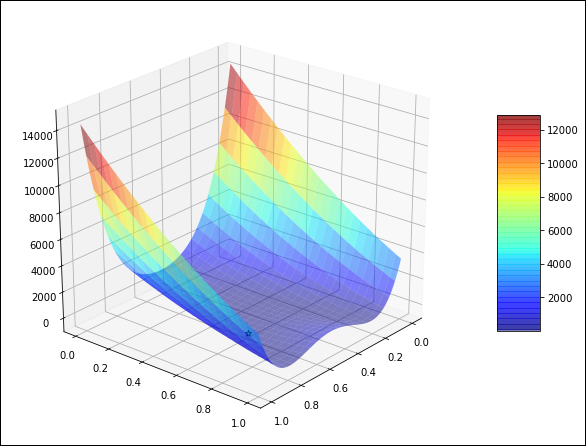

In [5]:
#%matplotlib notebook
fig1 = plt.figure(figsize=(8, 6), facecolor='w', edgecolor='k',
                  linewidth= 2.0, frameon=True)
ax = Axes3D(fig1, azim = 40, elev =25)
#ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Y, rstride=4, cstride=4, alpha=0.5,
                       cmap=cm.jet,
                       linewidth=0.4, antialiased=True)
ax.scatter([0.66],
            [0.66],
            alpha=1., c='w', edgecolor="k", marker='*', s=40,
            label='individuals')
cb = fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [6]:
index = 0
X = []
for i in range(10):
    X.append(np.load("./output/rose_pop_%d.npy" %index))
    index += 30
print(len(X))

10


[0.66666667 0.66666667]


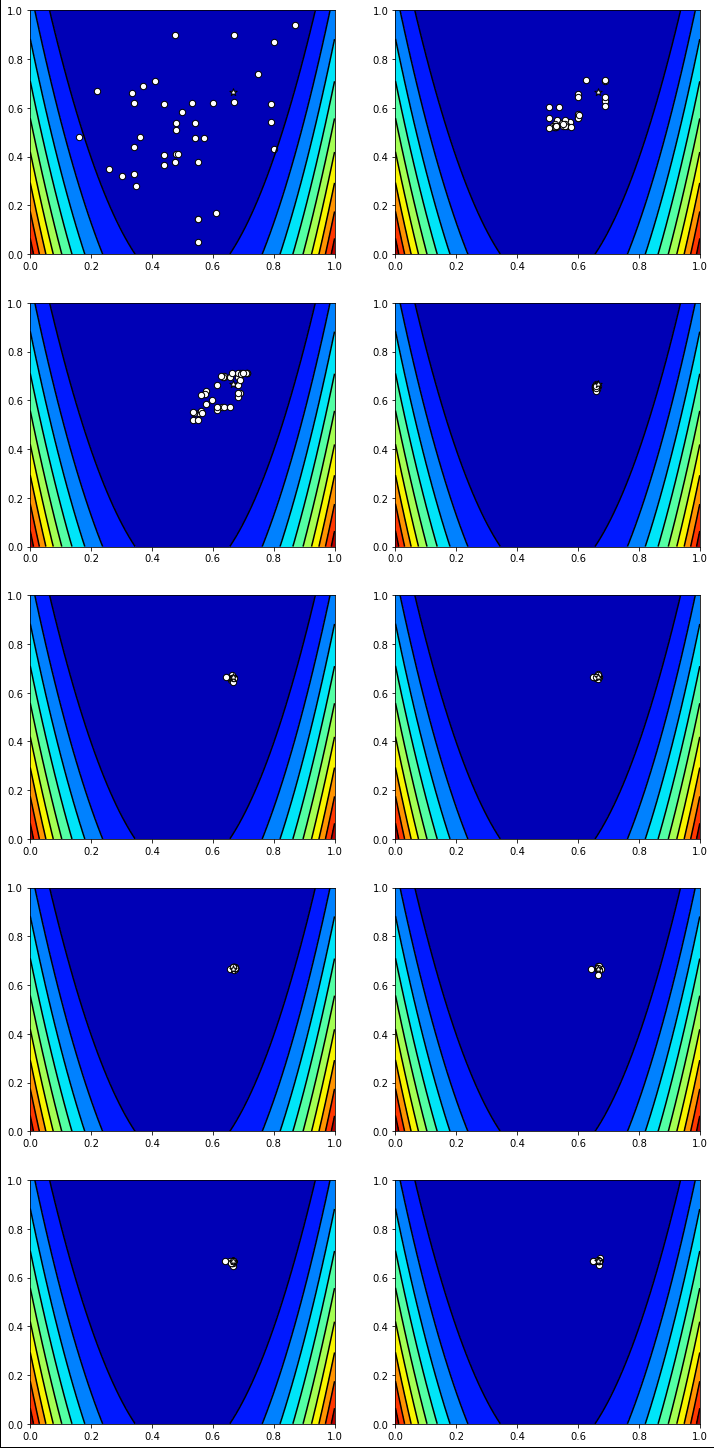

In [7]:
optim_X = np.array([1.0, 1.0])
norm_optim_X = (optim_X + 3)/6.0
print(norm_optim_X)
contour_levels=10
fig2 = plt.figure(figsize=(12, 26), facecolor='w', edgecolor='k',
                  linewidth= 2.0, frameon=True)
for i in range(len(X)):
    ax1 = fig2.add_subplot(5, 2, i+1)
    cs = ax1.contour(X1, X2, Y, contour_levels, colors=('k',), origin='lower')
    cnt = ax1.contourf(X1, X2, Y, contour_levels, cmap=cm.jet, origin='lower')
    ax1.scatter(X[i][:, 0],
                X[i][:, 1],
                alpha=1., c='w', edgecolor="k", marker='o', s=40,
                label='individuals')
    ax1.scatter([norm_optim_X[0]],
                [norm_optim_X[1]],
                alpha=1., c='w', edgecolor="k", marker='*', s=60,
                label='optimum')
# axins = inset_axes(ax1,
#                    width="10%", # width = 10% of parent_bbox width
#                    height="300%", # height : 50%
#                    loc=6,
#                    bbox_to_anchor=(4.0, 2.5, 1, 1),
#                    bbox_transform=ax1.transAxes,
#                    borderpad=0)

# cbar = plt.colorbar(cnt, cax=axins)
#ca = fig2.colorbar(cnt, shrink=0.5, aspect=5)
plt.show()

### Branin optimisation with `xnio::ga`
-------------------------------------------------------------

In [8]:
Y_branin = np.zeros((plotgrid, plotgrid), np.double)
for i in range(plotgrid):
    X = np.zeros((100, 2), np.double)
    X[:, 0] = X1[:, i]
    X[:, 1] = X2[:, i]
    Y_branin[:, i] = branin(X)

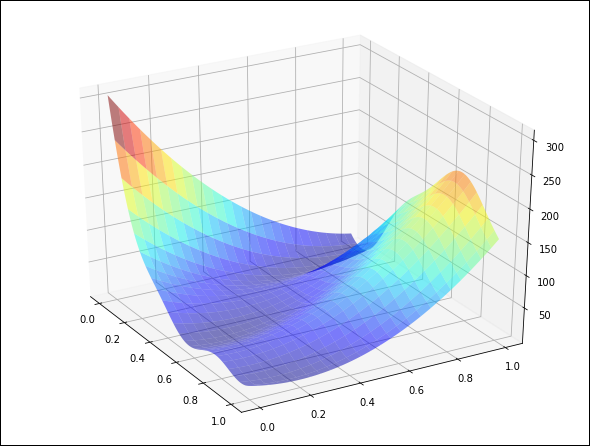

In [9]:
#%matplotlib notebook
fig3 = plt.figure(figsize=(8, 6), facecolor='w', edgecolor='k',
                  linewidth= 2.0, frameon=True)
ax = Axes3D(fig3, azim = -30, elev =30)
#ax = fig1.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Y_branin, rstride=4, cstride=4, alpha=0.5,
                       cmap=cm.jet,
                       linewidth=0.4, antialiased=True)
# ax.scatter([0.66],
#             [0.66],
#             alpha=1., c='w', edgecolor="k", marker='*', s=40,
#             label='individuals')
cb = fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [12]:
index = 0
X = []
for i in range(10):
    X.append(np.load("./output/branin_pop_%d.npy" %index))
    index += 30
print(len(X))

10


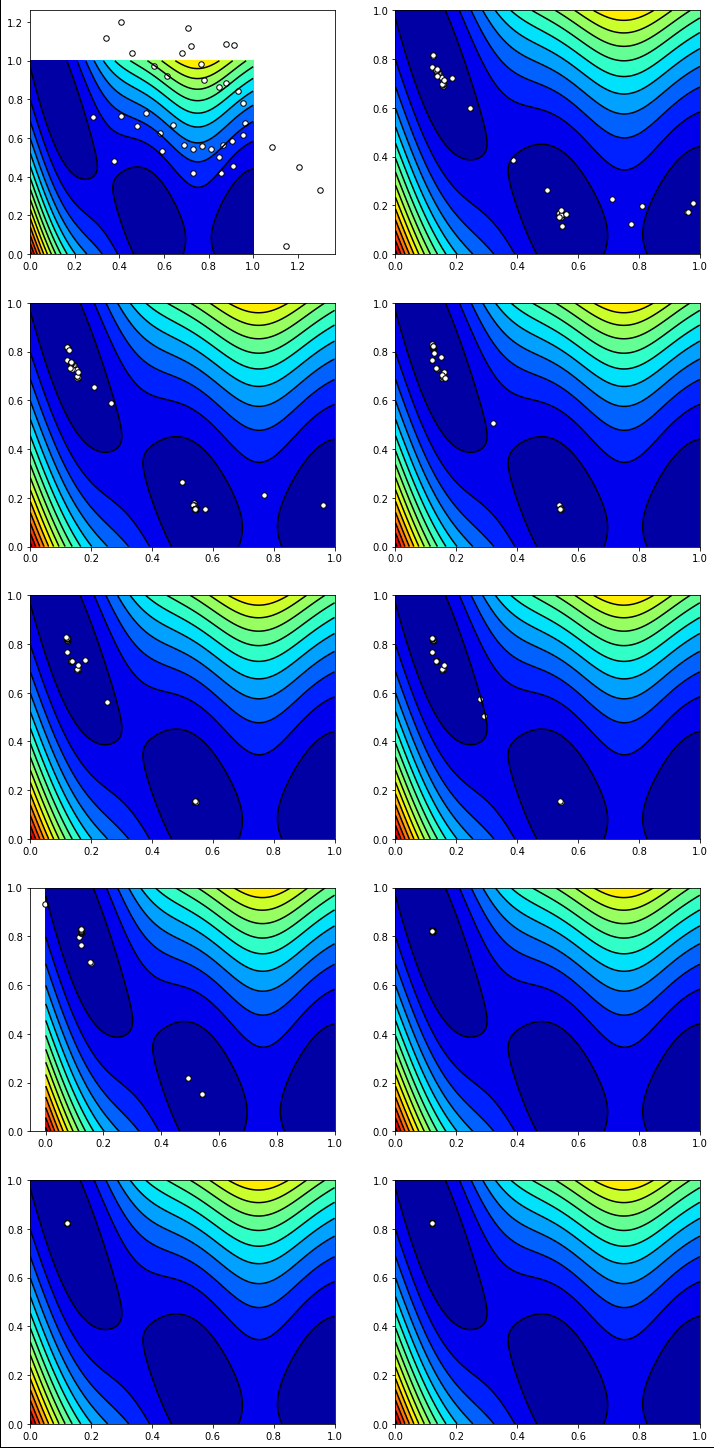

In [14]:
contour_levels=15
fig4 = plt.figure(figsize=(12, 26), facecolor='w', edgecolor='k',
                  linewidth= 2.0, frameon=True)
for i in range(len(X)):
    ax1 = fig4.add_subplot(5, 2, i+1)
    cs = ax1.contour(X1, X2, Y_branin, contour_levels, colors=('k',), origin='lower')
    cnt = ax1.contourf(X1, X2, Y_branin, contour_levels, cmap=cm.jet, origin='lower')
    ax1.scatter(X[i][:, 0],
                X[i][:, 1],
                alpha=1., c='w', edgecolor="k", marker='o', s=30,
                label='individuals')
# axins = inset_axes(ax1,
#                    width="10%", # width = 10% of parent_bbox width
#                    height="300%", # height : 50%
#                    loc=6,
#                    bbox_to_anchor=(4.0, 2.5, 1, 1),
#                    bbox_transform=ax1.transAxes,
#                    borderpad=0)

# cbar = plt.colorbar(cnt, cax=axins)
#ca = fig2.colorbar(cnt, shrink=0.5, aspect=5)
plt.show()